<a href="https://colab.research.google.com/github/jaafar19/NLP/blob/main/Markov_Models_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import string
from sklearn.model_selection import train_test_split


import gdown
file_id = "1D-aw5-_lhl_v3CznrLjKt56ZvJlyG1H4"
gdown.download(f"https://drive.google.com/uc?id={file_id}", quiet=False)


file_id = "16ifJC3T-eQCscAchvV26eWRGEZ88yD08"
gdown.download(f"https://drive.google.com/uc?id={file_id}", quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1D-aw5-_lhl_v3CznrLjKt56ZvJlyG1H4
To: /content/edgar_allen_poe.txt
100%|██████████| 389k/389k [00:00<00:00, 64.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=16ifJC3T-eQCscAchvV26eWRGEZ88yD08
To: /content/robert_frost.txt
100%|██████████| 138k/138k [00:00<00:00, 61.1MB/s]


'robert_frost.txt'

In [5]:
!head edgar_allen_poe.txt

*** START OF THE PROJECT GUTENBERG EBOOK 10031 ***

                        The Complete Poetical Works
                            of Edgar Allan Poe


                               edited by

                            John H. Ingram



In [6]:
!head robert_frost.txt

﻿The Project Gutenberg eBook of Selected Poems
    
This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this ebook or online
at www.gutenberg.org. If you are not located in the United States,
you will have to check the laws of the country where you are located
before using this eBook.



In [9]:
input_files = ["robert_frost.txt", "edgar_allen_poe.txt"]


#collect data into lists
input_texts = []
labels=[] # Change variable name to labels

for label_index, f in enumerate (input_files):
  print(f"{f} corresponds to label {label_index}")
  for line in open(f):
    line = line.rstrip()
    if line:
      line = line.translate(str.maketrans("", "" ,string.punctuation))
      input_texts.append(line)
      labels.append(label_index) # Append to labels instead of label

robert_frost.txt corresponds to label 0
edgar_allen_poe.txt corresponds to label 1


In [10]:
input_texts

['\ufeffThe Project Gutenberg eBook of Selected Poems',
 'This ebook is for the use of anyone anywhere in the United States and',
 'most other parts of the world at no cost and with almost no restrictions',
 'whatsoever You may copy it give it away or reuse it under the terms',
 'of the Project Gutenberg License included with this ebook or online',
 'at wwwgutenbergorg If you are not located in the United States',
 'you will have to check the laws of the country where you are located',
 'before using this eBook',
 'Title Selected Poems',
 'Author Robert Frost',
 'Release date June 27 2019 eBook 59824',
 'Language English',
 'Credits Produced by Laura Natal Rodrigues at Free Literature Images',
 '        generously made available by Hathi Trust',
 ' START OF THE PROJECT GUTENBERG EBOOK SELECTED POEMS ',
 'Produced by Laura Natal Rodrigues at Free Literature Images',
 'generously made available by Hathi Trust',
 'SELECTED POEMS',
 'BY',
 'ROBERT FROST',
 'NEW YORK',
 'HENRY HOLT AND COMP

In [11]:
labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [12]:
train_text, test_text, train_labels, test_labels = train_test_split(input_texts, labels, test_size=0.2)

In [16]:
len(train_labels), len(test_labels)

(8602, 2151)

In [17]:
train_text[:5]

['It can scarce be that they would be in number',
 '    If one could merely comprehend the plot',
 'Now drops that floated on the pool',
 'warranties or the exclusion or limitation of certain types of',
 'raconteur has either failed to entertain clearly or has sacrificed in']

In [18]:
train_labels[:5]

[0, 1, 0, 0, 1]

In [19]:
idx=1
word2idx = {'unk':0}

In [20]:
for text in train_text:
  tokens = text.split()
  for token in tokens:
    if token not in word2idx:
      word2idx[token] = idx
      idx += 1

In [21]:
word2idx

{'unk': 0,
 'It': 1,
 'can': 2,
 'scarce': 3,
 'be': 4,
 'that': 5,
 'they': 6,
 'would': 7,
 'in': 8,
 'number': 9,
 'If': 10,
 'one': 11,
 'could': 12,
 'merely': 13,
 'comprehend': 14,
 'the': 15,
 'plot': 16,
 'Now': 17,
 'drops': 18,
 'floated': 19,
 'on': 20,
 'pool': 21,
 'warranties': 22,
 'or': 23,
 'exclusion': 24,
 'limitation': 25,
 'of': 26,
 'certain': 27,
 'types': 28,
 'raconteur': 29,
 'has': 30,
 'either': 31,
 'failed': 32,
 'to': 33,
 'entertain': 34,
 'clearly': 35,
 'sacrificed': 36,
 'getting': 37,
 'their': 38,
 'assistance': 39,
 'towards': 40,
 'helping': 41,
 'him': 42,
 'put': 43,
 'a': 44,
 'drama': 45,
 'his': 46,
 'Their': 47,
 'coming': 48,
 'out': 49,
 'and': 50,
 'making': 51,
 'useful': 52,
 'farmers': 53,
 'Not': 54,
 'long': 55,
 'ago': 56,
 'writer': 57,
 'these': 58,
 'lines': 59,
 'Ask': 60,
 'them': 61,
 'help': 62,
 'you': 63,
 'get': 64,
 'it': 65,
 'its': 66,
 'feet': 67,
 'Well': 68,
 'then': 69,
 'she': 70,
 'said': 71,
 'then—like': 72,
 '

In [22]:
len(word2idx)

11124

In [23]:
train_text_int = []
test_text_int = []

for text in train_text:
  tokens = text.split()
  line_as_int = [word2idx[token] for token in tokens]
  train_text_int.append(line_as_int)

for text in test_text:
  tokens = text.split()
  line_as_int = [word2idx.get(token, 0) for token in tokens]
  test_text_int.append(line_as_int)

In [25]:
train_text_int[100:500]

[[107, 180, 499, 500, 258, 277, 501, 300, 258, 277, 407],
 [502, 15, 503, 302, 504, 505],
 [506, 44, 507, 508, 509, 510],
 [511, 202, 115, 11, 5, 512, 33, 513, 42, 337],
 [],
 [95, 376, 514, 515, 516, 118, 11],
 [240, 517, 518, 519, 179, 15, 520, 26, 521],
 [522, 8, 15, 523, 524, 42, 50, 421, 525],
 [526, 50, 527],
 [528, 347, 529],
 [110, 530, 531, 46, 532, 354],
 [533, 534, 15, 535, 66, 480, 536],
 [],
 [111, 537, 122, 538, 65, 539],
 [540, 541, 63, 260, 369, 322, 542, 543, 544],
 [110, 545, 114, 44, 546, 547, 548, 542, 549],
 [550, 551, 15, 552, 26, 168, 504, 553],
 [179],
 [110, 554, 111, 555, 8, 394, 556],
 [557],
 [107, 558, 26, 77, 559],
 [560, 11, 561, 86, 562, 279, 46, 144],
 [563, 421, 564, 356, 61, 399, 337, 15, 565],
 [566, 567, 568, 569, 570, 571, 42],
 [572, 202, 500, 44, 573, 11],
 [107, 574, 575, 576, 42, 337, 93, 577, 26, 578],
 [579, 44, 580, 514, 581, 582],
 [583, 50, 111, 584, 585, 33, 584, 66, 586],
 [587, 44, 413, 588, 589, 125, 122, 590, 240, 591],
 [256, 592, 21

In [32]:
v = len(word2idx)

A0 = np.zeros((v, v))
pi0 = np.zeros(v)

A1 = np.zeros((v, v))
pi1 = np.zeros(v)


In [33]:
def compute_counts(text_as_int, A, pi):
  for tokens in text_as_int:
    last_idx = None
    for idx in tokens:
      if last_idx is None:
        pi[idx] += 1
      else:
        A[last_idx, idx] += 1
      last_idx = idx



compute_counts([t for t, y in zip(train_text_int, train_labels) if y == 0], A0, pi0)
compute_counts([t for t, y in zip(train_text_int, train_labels) if y == 1], A1, pi1)

In [34]:
A0 /= A0.sum(axis=1, keepdims=True)
pi0 /= pi0.sum()

A1 /= A1.sum(axis=1, keepdims=True)
pi1 /= pi1.sum()


<ipython-input-34-f93a9b0f6a7c>:1: RuntimeWarning: invalid value encountered in divide
  A0 /= A0.sum(axis=1, keepdims=True)
<ipython-input-34-f93a9b0f6a7c>:4: RuntimeWarning: invalid value encountered in divide
  A1 /= A1.sum(axis=1, keepdims=True)


In [35]:
logA0 = np.log(A0)
logpi0 = np.log(pi0)

logA1 = np.log(A1)
logpi1 = np.log(pi1)


<ipython-input-35-64e74e0f0c3e>:1: RuntimeWarning: divide by zero encountered in log
  logA0 = np.log(A0)
<ipython-input-35-64e74e0f0c3e>:2: RuntimeWarning: divide by zero encountered in log
  logpi0 = np.log(pi0)
<ipython-input-35-64e74e0f0c3e>:4: RuntimeWarning: divide by zero encountered in log
  logA1 = np.log(A1)
<ipython-input-35-64e74e0f0c3e>:5: RuntimeWarning: divide by zero encountered in log
  logpi1 = np.log(pi1)


In [36]:
count0 = sum(y == 0 for y in train_labels)
count1 = sum(y == 1 for y in train_labels)

total = len(train_labels)
p0 = count0 / total
p1 = count1 / total
logp0 = np.log(p0)
logp1 = np.log(p1)
p0, p1

(0.29923273657289, 0.7007672634271099)

In [37]:
class classifier():
  def __init__(self, logAs, logpis, logpriors):
    self.logAs = logAs
    self.logpis = logpis
    self.logpriors = logpriors
    self.k = len(logpriors)

  def compute_log_likelihood(self, input_, class_):
    logA = self.logAs[class_]
    logpi = self.logpis[class_]

    last_idx = None
    logprob = 0

    for idx in input_:
      if last_idx is None:
        logprob += logpi[idx]
      else:
        logprob += logA[last_idx, idx]
      last_idx = idx

    return logprob


  def predict(self, inputs):
    predictions = np.zeros(len(inputs))
    for i, input_ in enumerate(inputs):
      posteriors = [self.compute_log_likelihood(input_, c) + self.logpriors[c] for c in range(self.k)]
      pred = np.argmax(posteriors)
      predictions[i]=pred
    return predictions

In [38]:
clf = classifier([logA0, logA1], [logpi0, logpi1], [logp0, logp1])

In [40]:
ptrain = clf.predict(train_text_int)
print (f"Train accuracy: {np.mean(ptrain == train_labels)}")

Train accuracy: 0.19844222273889794


In [41]:
ptest = clf.predict(test_text_int)
print (f"Test accuracy: {np.mean(ptest == test_labels)}")

Test accuracy: 0.2882380288238029


In [45]:
from sklearn.metrics import confusion_matrix, f1_score #
cm = confusion_matrix(test_labels, ptest)
cm

array([[ 531,  142],
       [1389,   89]])

In [47]:
f1_score(train_labels, ptrain) # Call f1_score

0.19535535068269344

In [48]:
f1_score(test_labels, ptest)

0.10415447630193095

In [49]:
cm = confusion_matrix(train_labels, ptrain)
cm

array([[ 870, 1704],
       [5191,  837]])

In [50]:
import numpy as np
from collections import Counter

# Assume y_train is your NumPy array of labels
unique, counts = np.unique(train_labels, return_counts=True)
print(dict(zip(unique, counts)))  # Show class distribution

{np.int64(0): np.int64(2574), np.int64(1): np.int64(6028)}


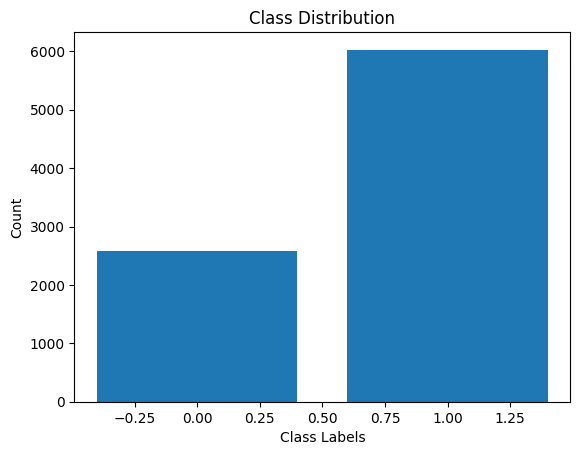

In [51]:
import matplotlib.pyplot as plt

plt.bar(unique, counts)
plt.xlabel("Class Labels")
plt.ylabel("Count")
plt.title("Class Distribution")
plt.show()